<a href="https://colab.research.google.com/github/rtphokie/AstronomyDaysStarChart/blob/main/BU_StarChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install skyfield
from skyfield.api import Star, load
from skyfield.data import hipparcos
from matplotlib import pyplot as plt

  Using cached skyfield-1.48-py3-none-any.whl (453 kB)
  Using cached jplephem-2.22-py3-none-any.whl (47 kB)
  Using cached sgp4-2.23-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (232 kB)


In [2]:

plt.style.use(['dark_background'])

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

ts = load.timescale()
t = ts.now()

eph = load('de421.bsp')
earth = eph['earth']

[#################################] 100% hip_main.dat
[#################################] 100% de421.bsp


In [3]:
print(f'There are {len(df)} stars in the Hipparcos catalog ({hipparcos.URL}).')
limiting_magnitude = 8.0
df_lim = df[df['magnitude'] <= limiting_magnitude]
print(f'After filtering out stars dimmer than mag {limiting_magnitude}, there are {len(df_lim)}')
bright_stars = Star.from_dataframe(df_lim)
print(f'the brightest star is magnitude', df_lim['magnitude'].min())

There are 118218 stars in the Hipparcos catalog (https://cdsarc.cds.unistra.fr/ftp/cats/I/239/hip_main.dat).
After filtering out stars dimmer than mag 8.0, there are 41411
the brightest star is magnitude -1.44


9
8
7
6
5
4
3
2
1


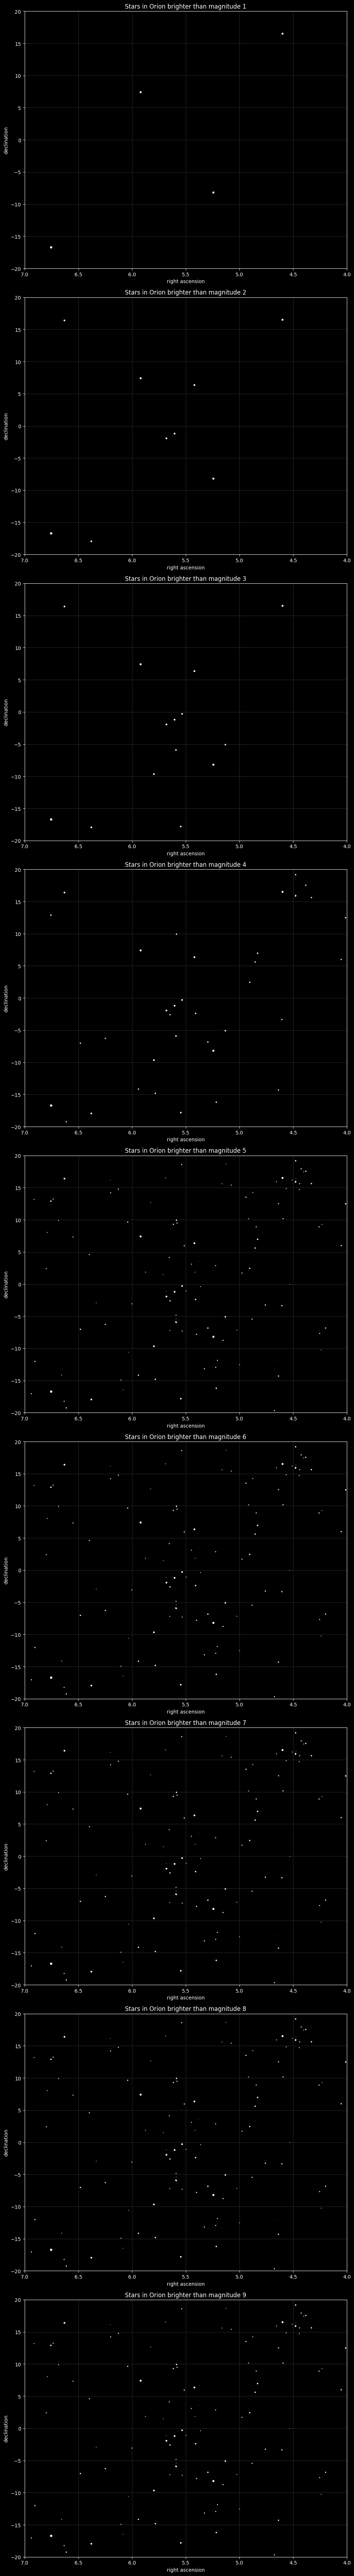

In [23]:
fig, ax = plt.subplots(9, figsize=(10,9*8))
for mag in range(9,0,-1):
  df_lim = df[df['magnitude'] <= mag]
  bright_stars = Star.from_dataframe(df_lim)
  astrometric = earth.at(t).observe(bright_stars)
  ra, dec, distance = astrometric.radec()
  ax[mag-1].scatter(ra.hours, dec.degrees, 2*(5-df_lim['magnitude']), 'w')
  ax[mag-1].set_xlabel('right ascension')
  ax[mag-1].set_xlim(7.0, 4.0)
  ax[mag-1].set_ylabel('declination')
  ax[mag-1].set_ylim(-20, 20)
  ax[mag-1].grid(color='gray', linestyle='-', linewidth=.5, alpha=.5)
  ax[mag-1].set(title=f'Stars in Orion brighter than magnitude {mag}')
plt.tight_layout()

fig.savefig(f'bright_stars_.png')